In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
file_path = "/kaggle/input/salary123/salary_data (1).csv"
dataset = open(file_path, "r")
lines = dataset.readlines()
cols = lines[0].split(',')
cols = [col.strip() for col in cols]
dataset.close()

In [3]:
all_data = {col: [] for col in cols}
for line in lines[1:]:
    values = line.split(',')
    values = [val.strip() for val in values]
    all_data['YearsExperience'].append(float(values[0]))
    all_data['Salary'].append(float(values[1]))

In [4]:
indices = list(range(len(all_data['YearsExperience'])))
random.shuffle(indices)

split_idx = int(0.8 * len(indices))
train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

train_df = {'YearsExperience': [], 'Salary': []}
test_df = {'YearsExperience': [], 'Salary': []}

for idx in train_indices:
    train_df['YearsExperience'].append(all_data['YearsExperience'][idx])
    train_df['Salary'].append(all_data['Salary'][idx])

for idx in test_indices:
    test_df['YearsExperience'].append(all_data['YearsExperience'][idx])
    test_df['Salary'].append(all_data['Salary'][idx])

In [5]:
total_years = 0
total_salary = 0
n = 0
for x in train_df['YearsExperience']:
    total_years += x
    n += 1
for y in train_df['Salary']:
    total_salary += y

mean_years = total_years / n
mean_salary = total_salary / n

In [6]:
standard_years = 0
for x in train_df['YearsExperience']:
    standard_years += (x - mean_years) ** 2
standard_years = (standard_years / n) ** 0.5

In [7]:
m_num = 0
m_den = 0
for i in range(n):
    m_num += (train_df['YearsExperience'][i] - mean_years) * (train_df['Salary'][i] - mean_salary)
for x in train_df['YearsExperience']:
    m_den += (x - mean_years) ** 2

m = m_num / m_den
b = mean_salary - m * mean_years

In [8]:
test_df['Predicted_Salary'] = [m * x + b for x in test_df['YearsExperience']]

In [9]:
mse = 0
for i in range(len(test_df['Salary'])):
    mse += (test_df['Predicted_Salary'][i] - test_df['Salary'][i]) ** 2
mse /= len(test_df['Salary'])
rmse = mse ** 0.5

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 376702241.34
Root Mean Squared Error (RMSE): 19408.82


In [10]:
ss_total = 0
ss_residual = 0
for i in range(len(test_df['Salary'])):
    ss_total += (test_df['Salary'][i] - mean_salary) ** 2
    ss_residual += (test_df['Salary'][i] - test_df['Predicted_Salary'][i]) ** 2
r_squared = 1 - (ss_residual / ss_total)
print(f"R-squared: {r_squared:.4f}")

R-squared: 0.9775


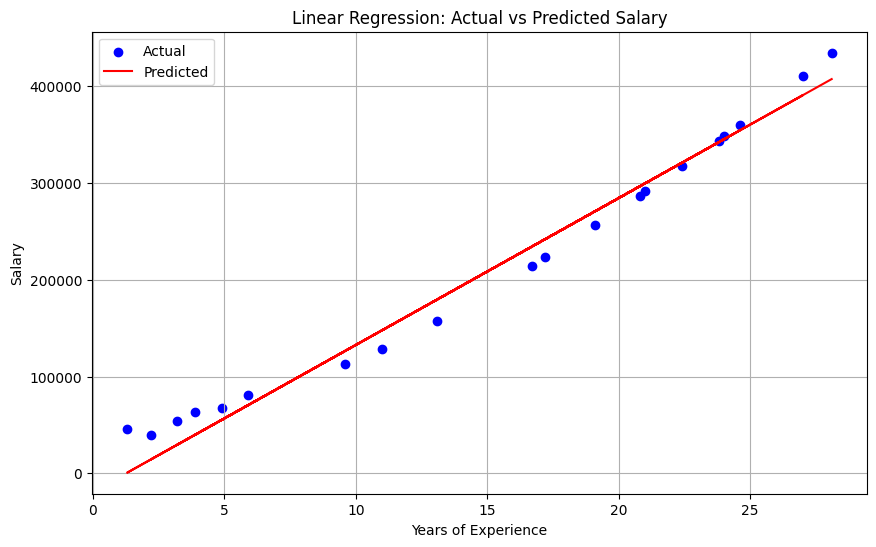

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(test_df['YearsExperience'], test_df['Salary'], color='blue', label='Actual')
plt.plot(test_df['YearsExperience'], test_df['Predicted_Salary'], color='red', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Actual vs Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()
